# Soal No 3

## a. Menulis ukuran berkas wav

In [1]:
import os

# Mengganti dengan path dan nama berkas WAV yang ingin dilihat ukurannya
filename = '/kaggle/input/data-suara/note_08_20222009.wav'

# Menggunakan method os.stat untuk mendapatkan informasi tentang berkas
file_info = os.stat(filename)

# Mengambil ukuran berkas dari informasi yang diperoleh
file_size = file_info.st_size

# Menampilkan ukuran berkas
print(f"Ukuran berkas {filename} adalah {file_size} bytes")

Ukuran berkas /kaggle/input/data-suara/note_08_20222009.wav adalah 352844 bytes


## b. Menampilkan durasi wav

In [2]:
import wave


# Menggunakan method wave.open untuk membuka berkas WAV
with wave.open(filename, 'rb') as wav_file:
    # Mendapatkan informasi tentang berkas WAV
    frames = wav_file.getnframes()
    rate = wav_file.getframerate()
    duration = frames / float(rate)
    
    # Menampilkan durasi audio
    print(f"Durasi audio {filename} adalah {duration:.2f} detik")

Durasi audio /kaggle/input/data-suara/note_08_20222009.wav adalah 4.00 detik


## c. Menampilkan sample rate file wav

In [4]:
    # Menampilkan sample rate
    print(f"Sample rate dari {filename} adalah {rate} Hz")

Sample rate dari /kaggle/input/data-suara/note_08_20222009.wav adalah 44100 Hz


## d. Melakukan fft 1-D dan menampilkan frekuensi wav

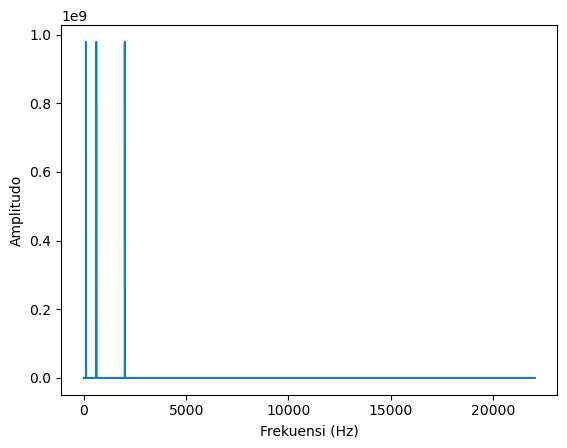

In [11]:
import numpy as np
from scipy.fft import rfft

# Menggunakan method wave.open untuk membuka berkas WAV
with wave.open(filename, 'rb') as wav_file:
    
    # Membaca data audio ke dalam array numpy 1D
    audio_data = np.frombuffer(wav_file.readframes(frames), dtype=np.int16)
    
    # Melakukan FFT pada data audio
    spectrum = rfft(audio_data)
    
    # Menentukan frekuensi-frekuensinya
    frequencies = np.fft.rfftfreq(frames, 1/rate)
    
    # Menampilkan plot spektrum frekuensi
    import matplotlib.pyplot as plt
    plt.plot(frequencies, np.abs(spectrum))
    plt.xlabel('Frekuensi (Hz)')
    plt.ylabel('Amplitudo')
    plt.show()

In [14]:
# hitung jumlah sample
jumlah_sample = len(audio_data)

# hitung frekuensi
frekuensi = np.fft.rfftfreq(jumlah_sample, d=1/rate)
# tampilkan hasil
print(f"Sample rate dari file {filename} adalah {rate} Hz.")
print(f"Jumlah sample adalah {jumlah_sample}.")
print(f"Frekuensi maksimum yang dapat ditampilkan adalah {rate/2} Hz.")
print(f"Frekuensi yang terdeteksi adalah {len(frekuensi)}.")
print(f"Frekuensi pertama adalah {frekuensi[0]} Hz.")
print(f"Frekuensi terakhir adalah {frekuensi[-1]} Hz.")

Sample rate dari file /kaggle/input/data-suara/note_08_20222009.wav adalah 44100 Hz.
Jumlah sample adalah 176400.
Frekuensi maksimum yang dapat ditampilkan adalah 22050.0 Hz.
Frekuensi yang terdeteksi adalah 88201.
Frekuensi pertama adalah 0.0 Hz.
Frekuensi terakhir adalah 22050.0 Hz.


In [30]:
import soundfile as sf
import numpy as np

audio, samplerate = sf.read(filename)

from scipy.fft import rfft

X = rfft(audio)
N = len(audio)
freqs = np.fft.fftfreq(N, d=1/samplerate)[:N//2+1]
peak_indices = np.argsort(np.abs(X))[-3:] # 3 frekuensi puncak terbesar
peak_freqs = freqs[peak_indices]
print("Tiga frekuensi puncak terbesar adalah:")
for freq in peak_freqs:
    print("{:.2f} Hz".format(freq))

Tiga frekuensi puncak terbesar adalah:
600.00 Hz
100.00 Hz
2000.00 Hz


# Soal No 4

## a. Menampilkan ukuran berkas PNG

In [19]:
# Import paket
import matplotlib.pyplot as plt
from scipy import fftpack
import numpy as np

# Buat nama/lokasi file
ofname = '/kaggle/input/file-gambarr/20222009.png'

ukuran = os.path.getsize(ofname)

print(f"ukuran file {ukuran} bytes")

# Import gambar sebagai float (desimal)
im = plt.imread(ofname).astype(float)

ukuran file 4379 bytes


## b. Menampilkan ukuran berkas citra PNG

In [20]:
import cv2

print(type(im))
# <class 'numpy.ndarray'>

print(im.shape)
print(type(im.shape))
h, w, c = im.shape
print('width:  ', w)
print('height: ', h)
print('channel:', c)

<class 'numpy.ndarray'>
(100, 100, 4)
<class 'tuple'>
width:   100
height:  100
channel: 4


## c. Menampilkan pixel mode dari PNG

In [22]:
from PIL import Image

# Open image file
img = Image.open(ofname)

# Print image mode
print('Image Mode:', img.mode)

Image Mode: RGBA


## d. Melakukan fft 2-D dan menampilkan frekuensi PNG

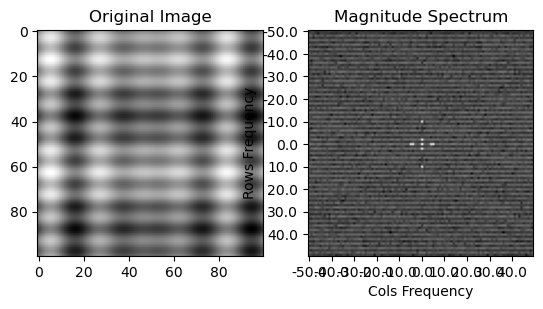

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load image as grayscale
img = Image.open(ofname).convert('L')
img_arr = np.array(img)

# Compute 2D FFT of the image
f = np.fft.fft2(img_arr)

# Shift zero frequency component to the center of the spectrum
fshift = np.fft.ifftshift(f)

# Compute magnitude spectrum
magnitude_spectrum = 20*np.log(np.abs(fshift))

# Compute frequency axis
rows, cols = img_arr.shape
freq_rows = np.fft.fftfreq(rows, 1/rows)
freq_cols = np.fft.fftfreq(cols, 1/cols)
freq_rows = np.fft.ifftshift(freq_rows)
freq_cols = np.fft.ifftshift(freq_cols)

# Display the original image and magnitude spectrum
fig, axs = plt.subplots(1, 2)
axs[0].imshow(img_arr, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(magnitude_spectrum, cmap='gray')
axs[1].set_title('Magnitude Spectrum')
axs[1].set_xlabel('Cols Frequency')
axs[1].set_ylabel('Rows Frequency')
axs[1].set_xticks(np.arange(0, cols, cols//10))
axs[1].set_xticklabels(freq_cols[np.arange(0, cols, cols//10)])
axs[1].set_yticks(np.arange(0, rows, rows//10))
axs[1].set_yticklabels(freq_rows[np.arange(0, rows, rows//10)])
plt.show()


In [35]:
import numpy as np
import scipy.fft as fft
import matplotlib.pyplot as plt

# Baca file gambar dan ubah menjadi grayscale
gray_image = np.mean(im, axis=2)

# Hitung 2-D FFT menggunakan fft2 dari scipy.fft
fft_output = fft.fft2(gray_image)

# Ambil amplitudo dari FFT output dan normalisasi
amplitude = np.abs(fft_output)
normalized_amplitude = amplitude / np.max(amplitude)

# Ambil frekuensi-frekuensi pada sumbu horizontal dan vertikal menggunakan fftfreq dari scipy.fft
freqs = fft.fftfreq(gray_image.shape[0]), fft.fftfreq(gray_image.shape[1])

# Cari amplitudo tertinggi dari setiap baris dan kolom menggunakan argmax dari NumPy
max_row_indices = np.argmax(normalized_amplitude, axis=1)
max_col_indices = np.argmax(normalized_amplitude, axis=0)

# Ambil frekuensi-frekuensi terkait dari frekuensi-frekuensi yang dihitung di atas
dominant_freqs = (np.abs(freqs[0][max_row_indices]), np.abs(freqs[1][max_col_indices]))

# Tampilkan hasil dengan print statement
print("Frekuensi-frekuensi dominan pada gambar: ", dominant_freqs)


Frekuensi-frekuensi dominan pada gambar:  (array([0.  , 0.04, 0.  , 0.23, 0.22, 0.14, 0.47, 0.37, 0.46, 0.  , 0.  ,
       0.04, 0.12, 0.48, 0.19, 0.48, 0.36, 0.4 , 0.5 , 0.16, 0.35, 0.36,
       0.4 , 0.22, 0.22, 0.32, 0.37, 0.28, 0.47, 0.1 , 0.38, 0.11, 0.36,
       0.12, 0.11, 0.02, 0.36, 0.48, 0.31, 0.26, 0.12, 0.14, 0.41, 0.1 ,
       0.24, 0.34, 0.18, 0.12, 0.36, 0.3 , 0.41, 0.3 , 0.36, 0.12, 0.18,
       0.34, 0.24, 0.4 , 0.41, 0.14, 0.12, 0.26, 0.31, 0.48, 0.36, 0.02,
       0.11, 0.12, 0.36, 0.11, 0.38, 0.4 , 0.47, 0.28, 0.37, 0.18, 0.22,
       0.22, 0.4 , 0.36, 0.35, 0.34, 0.5 , 0.4 , 0.36, 0.02, 0.19, 0.48,
       0.12, 0.04, 0.  , 0.  , 0.46, 0.37, 0.47, 0.14, 0.22, 0.23, 0.  ,
       0.04]), array([0.  , 0.14, 0.3 , 0.06, 0.  , 0.  , 0.22, 0.02, 0.36, 0.36, 0.32,
       0.06, 0.12, 0.  , 0.  , 0.  , 0.14, 0.32, 0.14, 0.14, 0.14, 0.  ,
       0.04, 0.02, 0.12, 0.12, 0.12, 0.14, 0.06, 0.36, 0.26, 0.06, 0.12,
       0.06, 0.32, 0.2 , 0.36, 0.1 , 0.28, 0.16, 0.32, 0.02, 0.  ,